## What is scikit-learn?

The scikit-learn is a Python module for machine learning built on top of NumPy, SciPy, and matplotlib.
The scikit-learn is one of the most popular open source machine learning libraries (packages) in Python.
The scikit-learn is a part of anaconda distribution.

The scikit-learn has nice API http://scikit-learn.org/stable/ with full of examples, documentation and explanation.

Alternative installation

**conda install scikit-learn** or **pip install -U scikit-learn**


## Requirements for working with data in scikit-learn

* Features and response should be numeric (NumPy arrays or sparse matrix)

* Features and response are separate objects and they should be in specific shape

scikit-learn   data    ndarray (python list will be converted) or sparse matrices

X   feature (attribute, independent variable)       two-dimensional arrays
y response (target, label, dependent variable)   one dimensional array   (series)  

Scikit-learn main methods: fit, predict, transform, score
    
model.fit(X,y)

model.predict(X_new)               model.predict_proba() # uncertanty

model.score()

model.transform()   #unsupervised or feature selection



## Scikit-learn modelling steps

1 Import the class (estimator)
from sklearn.linear_model import LogisticRegression

2 instantiate the class (estimator) and assign to an object clf_logreg. We can specify tuning parameters here otherwise the default parameters will be applied.
clf_logreg = LogisticRegression()

3 Build the model  (train or fit the model with data)
clf_logreg.fit(X, y)                                                    clf_logreg.fit(X_train, y_train)


4 Predict  the response values for X    and assign an object y_pred        X_train         
y_pred = clf_logreg.predict(X)


Make predictions based on the test data      on unseen data

predictions = clf_logreg.predict(test[features])




The below is very good book from the main contributor to scikit-learn module.

# Introduction to Machine Learning with Python  
 by  Andreas C. Mueller , Sarah Guido 


# Data Analysis and Modelling Titanic Starter

The datasets can be downloaded from Kaggle.  https://www.kaggle.com/c/titanic

In [1]:
import sys
print("Python version: {}".format(sys.version))

Python version: 3.6.0 |Anaconda 4.3.0 (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]


In [2]:
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

scikit-learn version: 0.18.1


In [3]:
#import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [4]:
# Load data
train = pd.read_csv('input/train.csv')  
test = pd.read_csv('input/test.csv')

## Data Exploration

In [5]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [8]:
print ("Dimension of train data {}".format(train.shape))

Dimension of train data (891, 12)


In [9]:
#train.dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
print(train.columns.values)
#train.columns

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### Working with missing values

In [12]:
#Return columns with missing values from both data sets  only for numerical data
mv = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['Train', 'Test'])
mv[mv.sum(axis=1) > 0]

,Train,Test
Age,177,86.0
Cabin,687,327.0
Embarked,2,0.0
Fare,0,1.0


In [13]:
#train missing data percentage
t = train.isnull().sum().sort_values(ascending=False)
percentage = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
mvp = pd.concat([t, percentage], axis=1, keys=['Train Missing Values', 'Percentage'])
mvp.head()

,Train Missing Values,Percentage
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000


### very simple imputation technique

In [14]:
#imputing age
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(train["Age"].median())

In [15]:
#train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode())
train.Embarked.fillna("S", inplace=True)   #most common

In [16]:
test["Fare"] = test["Fare"].fillna(train["Fare"].median())

In [17]:
# remap categorical wih numerical
train['Sex'] = train['Sex'].map({'male':0,'female':1})
train['Embarked'] = train['Embarked'].map({'S':0,'C':1,'Q':2})
#test
test['Sex'] = test['Sex'].map({'male':0,'female':1})
test['Embarked'] = test['Embarked'].map({'S':0,'C':1,'Q':2})


### Feature Engineering

In [18]:
# Create a family size feature including the passenger themselves
train["FamilySize"] = train["SibSp"] + train["Parch"]+1
print(train["FamilySize"].value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


In [19]:
# Create a family size feature including the passenger themselves
test["FamilySize"] = test["SibSp"] + test["Parch"]+1
print(test["FamilySize"].value_counts())

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: FamilySize, dtype: int64


In [20]:
#Create isAlone feature based off family size
train['isAlone']=0
train.loc[train['FamilySize']==1, 'isAlone'] = 1

In [21]:
#Create isAlone feature based off family size
test['isAlone']=0
test.loc[test['FamilySize']==1, 'isAlone'] = 1

In [22]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,isAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1


In [23]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,isAlone
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,1,1


In [24]:
#train = train.drop(['isAlone','isAlone_'], axis=1)
#test = test.drop(['isAlone','Cabin_Letter'], axis=1)

In [25]:
#cabin
#train.Cabin
#train['Title'] = train['Name'].map(lambda x:x.split(",")[1].split(".")[0].strip())

In [26]:
#create title feature
#train['Title'] = train['Name'].apply(lambda x: x.split(",")[1].split(" ")[1])

# extract the title from each name
train['Title'] = train['Name'].map(lambda x:x.split(",")[1].split(".")[0].strip())
    
# a map of more aggregated titles
Title_Dictionary = {
                        "Capt":       "Manager",
                        "Col":        "Manager",
                        "Major":      "Manager",
                        "Jonkheer":   "Noble",
                        "Don":        "Noble",
                        "Sir" :       "Noble",
                        "Dr":         "Manager",
                        "Rev":        "Manager",
                        "the Countess":"Noble",
                        "Dona":       "Noble",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Noble"

                        }
    
# map each title
train['Title'] = train.Title.map(Title_Dictionary)



train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,isAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1,Mr


In [27]:
#create title feature  test

test['Title'] = test['Name'].map(lambda x:x.split(",")[1].split(".")[0].strip())
    
# a map of more aggregated titles
Title_Dictionary = {
                        "Capt":       "Manager",
                        "Col":        "Manager",
                        "Major":      "Manager",
                        "Jonkheer":   "Noble",
                        "Don":        "Noble",
                        "Sir" :       "Noble",
                        "Dr":         "Manager",
                        "Rev":        "Manager",
                        "the Countess":"Noble",
                        "Dona":       "Noble",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Noble"

                        }
    
# map each title
test['Title'] = test.Title.map(Title_Dictionary)



test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,isAlone,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,1,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,2,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,1,1,Mr
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,1,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,3,0,Mrs


In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,isAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1,Mr


In [29]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)



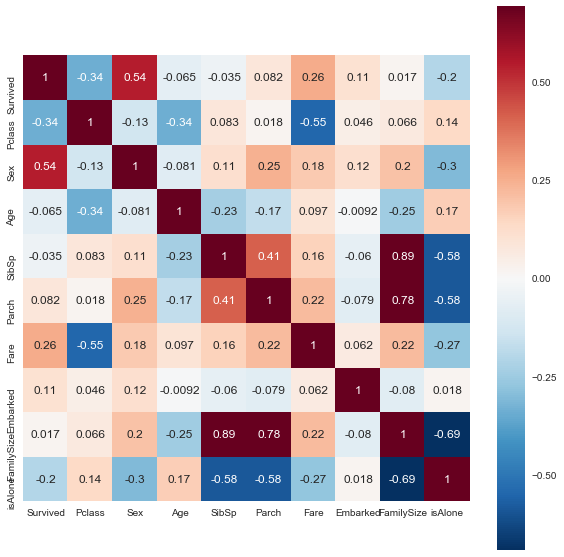

In [30]:
plt.figure(figsize=(10,10))
foo = sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

In [31]:
# we need to drop highly correlated features   FamilySize ?

In [32]:
train = train.drop(['SibSp','Parch'], axis=1)
test = test.drop(['SibSp','Parch'], axis=1)

In [33]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [34]:
#drop Name
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

# Convert Categorical features into Numerical ones

In [35]:
##Dummy variables
train = pd.get_dummies(train, columns = ['Title'])
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone,Title_Manager,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble
0,1,0,3,0,22.0,7.2500,0,2,0,0,0,0,1,0,0
1,2,1,1,1,38.0,71.2833,1,2,0,0,0,0,0,1,0
2,3,1,3,1,26.0,7.9250,0,1,1,0,0,1,0,0,0
3,4,1,1,1,35.0,53.1000,0,2,0,0,0,0,0,1,0
4,5,0,3,0,35.0,8.0500,0,1,1,0,0,0,1,0,0


In [36]:
##Dummy variables
test = pd.get_dummies(test, columns = ['Title'])
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone,Title_Manager,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble
0,892,3,0,34.5,7.8292,2,1,1,0,0,0,1,0,0
1,893,3,1,47.0,7.0000,0,2,0,0,0,0,0,1,0
2,894,2,0,62.0,9.6875,2,1,1,0,0,0,1,0,0
3,895,3,0,27.0,8.6625,0,1,1,0,0,0,1,0,0
4,896,3,1,22.0,12.2875,0,3,0,0,0,0,0,1,0


In [37]:
#check missing values
pd.isnull(train).any()

PassengerId      False
Survived         False
Pclass           False
Sex              False
Age              False
Fare             False
Embarked         False
FamilySize       False
isAlone          False
Title_Manager    False
Title_Master     False
Title_Miss       False
Title_Mr         False
Title_Mrs        False
Title_Noble      False
dtype: bool

In [38]:
pd.isnull(test).any()

PassengerId      False
Pclass           False
Sex              False
Age              False
Fare             False
Embarked         False
FamilySize       False
isAlone          False
Title_Manager    False
Title_Master     False
Title_Miss       False
Title_Mr         False
Title_Mrs        False
Title_Noble      False
dtype: bool

In [39]:
#Data cleaned and prepared for further modelling. More feature engineering is required.
# Cabin   more work !!!

In [40]:
# Create the csv file
train.to_csv('train_cleaned.csv', index = False)

In [42]:
test.to_csv('test_cleaned.csv', index = False)

In [43]:
# Load data     check
train_cleaned = pd.read_csv('train_cleaned.csv')  
train_cleaned.head(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone,Title_Manager,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble
0,1,0,3,0,22.0,7.2500,0,2,0,0,0,0,1,0,0
1,2,1,1,1,38.0,71.2833,1,2,0,0,0,0,0,1,0
2,3,1,3,1,26.0,7.9250,0,1,1,0,0,1,0,0,0


# Modelling

In [41]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Sex' 'Age' 'Fare' 'Embarked'
 'FamilySize' 'isAlone' 'Title_Manager' 'Title_Master' 'Title_Miss'
 'Title_Mr' 'Title_Mrs' 'Title_Noble']


In [42]:
features = ['PassengerId','Pclass','Sex','Age','Fare','Embarked',
 'FamilySize','isAlone','Title_Manager','Title_Master','Title_Miss',
 'Title_Mr','Title_Mrs','Title_Noble']

target = ["Survived"]

In [43]:
X = train[['PassengerId','Pclass','Sex','Age','Fare','Embarked',
 'FamilySize','isAlone','Title_Manager','Title_Master','Title_Miss',
 'Title_Mr','Title_Mrs','Title_Noble']]

y = train["Survived"]

In [44]:
X.shape

(891, 14)

In [45]:
y.shape

(891,)

## Build model with X and y

In [46]:
#import class
from sklearn.linear_model import LogisticRegression
# Initialize our algorithm class
logreg = LogisticRegression()
#Build model
logreg.fit(X, y)
print("logistic regression score: %f" % logreg.score(X, y))   #check the accuracy

logistic regression score: 0.832772


In [47]:
#Method chaining
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X, y)
print("logistic regression score: %f" % logreg.score(X, y))               #training accuracy - same data for building the model

logistic regression score: 0.832772


In [48]:
# our goal to build the model to predict on an unknown data

# Model evaluation

### 1 Train/test split    
### 2 Holdout validation, if we have large data set we can do holdout validation. train, test, validation i.e. 60,20,20%
### 3 K-Fold Cross-validation is the best  but it is require more time to validate

In [49]:
# import train_test_split from sklearn model_selection    previously was cross_validation
from sklearn.model_selection import train_test_split

In [50]:
#random_state=123 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=123)
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=random_state)

We will train model on training set  and evaluate model on testing set

Features response
X_train  y_train  building the model
X_test   y_test   evaluating the model

In [51]:
#predict most frequent class   . probably who died
from sklearn.dummy import DummyClassifier

clf = DummyClassifier('most_frequent')
clf.fit(X, y)
print("Prediction accuracy: %f" % clf.score(X_test, y_test))

Prediction accuracy: 0.634328


In [52]:
#from sklearn.linear_model import LogisticRegression #make sure it was loaded
clr_logreg = LogisticRegression().fit(X_train, y_train)
print("logistic regression score: %f" % clr_logreg.score(X_test, y_test))   #testing accuracy

logistic regression score: 0.843284


In [53]:
print("Training set score: {:.4f}".format(clr_logreg.score(X_train, y_train)))
print("Test set score: {:.4f}".format(clr_logreg.score(X_test, y_test)))

Training set score: 0.8266
Test set score: 0.8433


In [54]:
# Make predictions based on the test data
y_pred = clr_logreg.predict(test[features])

In [55]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [56]:
submission_logreg = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": y_pred})
submission_logreg.to_csv('submission_logreg.csv', index=False)
submission_logreg.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


## Parameter tuning GridsearchCV

In [63]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5, verbose=3)
grid.fit(X_train, y_train)
print('Best score for LogisticRegression: {}'.format(grid.score(X_test, y_test)))
print('Best parameters for LogisticRegression: {}'.format(grid.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.001 .........................................................
[CV] .......................... C=0.001, score=0.600000, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................... C=0.001, score=0.696000, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................... C=0.001, score=0.712000, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................... C=0.001, score=0.704000, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................... C=0.001, score=0.682927, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................... C=0.01, score=0.696000, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


In [65]:
from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LogisticRegression

param_grid = {'C': [4,6,8,10,12]}

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5, verbose=0)
grid.fit(X_train, y_train)
print('Best score for LogisticRegression: {}'.format(grid.score(X_test, y_test)))
print('Best parameters for LogisticRegression: {}'.format(grid.best_params_))

Best score for LogisticRegression: 0.8395522388059702
Best parameters for LogisticRegression: {'C': 6}


In [60]:
#from sklearn.metrics import confusion_matrix
#confusion = confusion_matrix(y_test, y_pred)
#print("Confusion matrix:\n{}".format(confusion))

In [61]:
#from sklearn.metrics import accuracy_score
#print('Accuracy score: ', accuracy_score(y_test, y_pred))  

#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))

#from sklearn.model_selection import cross_val_score
#cross_val_score(SVC(), X, y, scoring="roc_auc")

In [66]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.765


In [63]:
# overfitted

In [64]:

#from sklearn.tree import export_graphviz
#export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
#feature_names=features, impurity=False, filled=True)

In [65]:
#import graphviz
#with open("tree.dot") as f:
#    dot_graph = f.read()
#graphviz.Source(dot_graph)

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
scores = cross_val_score(clr_logreg, X, y, cv=5)  #By default, cross_val_score will use StratifiedKFold for classification
print(scores)
print(np.mean(scores))

[ 0.83240223  0.82681564  0.79775281  0.80337079  0.87570621]
0.827209537458


In [69]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

cv=5
# each parameter setting do cross-validation:
for C in [0.001, 0.01, 0.1, 1, 10]:
    for gamma in [0.001, 0.01, 0.1, 1]:
        scores = cross_val_score(SVC(C=C, gamma=gamma), X, y, cv=cv)
        print("C: %f, gamma: %f, average score: %f" % (C, gamma, np.mean(scores)))

C: 0.001000, gamma: 0.001000, average score: 0.616165
C: 0.001000, gamma: 0.010000, average score: 0.616165
C: 0.001000, gamma: 0.100000, average score: 0.616165
C: 0.001000, gamma: 1.000000, average score: 0.616165
C: 0.010000, gamma: 0.001000, average score: 0.616165
C: 0.010000, gamma: 0.010000, average score: 0.616165
C: 0.010000, gamma: 0.100000, average score: 0.616165
C: 0.010000, gamma: 1.000000, average score: 0.616165
C: 0.100000, gamma: 0.001000, average score: 0.616165
C: 0.100000, gamma: 0.010000, average score: 0.616165
C: 0.100000, gamma: 0.100000, average score: 0.616165
C: 0.100000, gamma: 1.000000, average score: 0.616165
C: 1.000000, gamma: 0.001000, average score: 0.477285
C: 1.000000, gamma: 0.010000, average score: 0.589299
C: 1.000000, gamma: 0.100000, average score: 0.615048
C: 1.000000, gamma: 1.000000, average score: 0.616165
C: 10.000000, gamma: 0.001000, average score: 0.485169
C: 10.000000, gamma: 0.010000, average score: 0.583706
C: 10.000000, gamma: 0.100

In [70]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv, verbose=3)

In [71]:
grid.fit(X, y)
grid.predict(X)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............. C=0.001, gamma=0.001, score=0.614525, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............. C=0.001, gamma=0.001, score=0.614525, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............. C=0.001, gamma=0.001, score=0.617978, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............. C=0.001, gamma=0.001, score=0.617978, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............. C=0.001, gamma=0.001, score=0.615819, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .............. C=0.001, gamma=0.01, score=0.614525, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .............. C=0.001, gamma=0.01, score=0.614525, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .............. C=0.001, gamma=0.01, score=0.617978, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .............. C=0.001, gamma=0.01, score=0.617978, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .............. C=0.001, gamma=0.01, score=0.615819, total=   0.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ............... C=0.001, gamma=0.1, score=0.614525, total=   0.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ............... C=0.001, gamma=0.1, score=0.614525, total=   0.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.0s finished


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [71]:
print(grid.best_score_)

0.616161616162


In [72]:
print(grid.best_params_)

{'C': 0.001, 'gamma': 0.001}


In [73]:
#from sklearn.svm import SVC
SVC().fit(X_train, y_train).score(X_test, y_test)

0.60447761194029848

In [74]:
grid.best_estimator_

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [76]:
SVC().fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

0.79477611940298509

## Pipelines

In [77]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(MinMaxScaler(), 
                         LogisticRegression())

grid = GridSearchCV(pipeline,
                    param_grid={'logisticregression__C': [.1, 1, 10, 100]}, cv=5)

grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.83955223880597019

In [78]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {'SVC__C': [0.001, 0.01, 0.1, 1, 10], 'SVC__gamma': [0.001, 0.01, 0.1, 1]}

#grid = GridSearchCV(pipeline, param_grid)
#grid.fit(X_train, y_train)
#grid.score(X_test, y_test)

In [79]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
grid = GridSearchCV(LinearSVC(C=.01, dual=False),
                    param_grid={'penalty' : ['l1', 'l2']},
                    scoring="roc_auc")
grid.fit(X, y)
print(grid.best_params_)

{'penalty': 'l2'}


In [80]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5, verbose=3)
grid.fit(X_train, y_train)
print('Best score for LogisticRegression: {}'.format(grid.score(X_test, y_test)))
print('Best parameters for LogisticRegression: {}'.format(grid.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.001 .........................................................
[CV] .......................... C=0.001, score=0.600000, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................... C=0.001, score=0.696000, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................... C=0.001, score=0.712000, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................... C=0.001, score=0.704000, total=   0.0s
[CV] C=0.001 .........................................................
[CV] .......................... C=0.001, score=0.682927, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................... C=0.01, score=0.696000, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
              'gamma': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5, verbose=3)
grid.fit(X_train, y_train)
print('Best score for SVC: {}'.format(grid.score(X_test, y_test)))
print('Best parameters for SVC: {}'.format(grid.best_params_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.001, gamma=0.01 .............................................
[CV] .............. C=0.001, gamma=0.01, score=0.608000, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .............. C=0.001, gamma=0.01, score=0.608000, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .............. C=0.001, gamma=0.01, score=0.608000, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .............. C=0.001, gamma=0.01, score=0.608000, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .............. C=0.001, gamma=0.01, score=0.609756, total=   0.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ............... C=0.001, gamma=0.1, score=0.608000, total=   0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.001, gamma=0.1 ..............................................
[CV] ............... C=0.001, gamma=0.1, score=0.608000, total=   0.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ............... C=0.001, gamma=0.1, score=0.608000, total=   0.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ............... C=0.001, gamma=0.1, score=0.608000, total=   0.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] ............... C=0.001, gamma=0.1, score=0.609756, total=   0.0s
[CV] C=0.001, gamma=1 ................................................
[CV] ................. C=0.001, gamma=1, score=0.608000, total=   0.0s
[CV] C=0.001, gamma=1 ................................................
[CV] ................. C=0.001, gamma=1, score=0.608000, total=   0.0s
[CV] C=0.001, gamma=1 ................................................
[CV] ................. C=0.001, gamma=1, score=0.608000, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    5.6s finished


In [82]:
#Best score for GradientBoostingClassifier: 0.8432835820895522
#Best parameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 1}

In [83]:
# Make predictions based on the test data
#predictions = gbc.predict(test[features])

#submission_logreg = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": predictions})
#submission_logreg.to_csv('submission_gbc.csv', index=False)

In [84]:
#k 0.77990

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
param_test1 = {'n_estimators':range(50,121,10)}
gbc2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                               min_samples_leaf=50,
                                                               max_features=9,
                                                               subsample=0.8,
                                                               random_state=123), 
                        param_grid = param_test1, 
                        scoring='roc_auc', cv=5)
gbc2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=9, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=50,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=123,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(50, 121, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [74]:
cols = ['mean_test_score','std_test_score','param_n_estimators','rank_test_score']
pd.DataFrame(gbc2.cv_results_)[cols].sort_values('rank_test_score').head(10)

,mean_test_score,std_test_score,param_n_estimators,rank_test_score
1,0.845593,0.038992,60,1
0,0.845112,0.036148,50,2
3,0.845042,0.041261,80,3
4,0.844522,0.040317,90,4
2,0.843194,0.040892,70,5
5,0.841862,0.039692,100,6
7,0.841814,0.039015,120,7
6,0.841692,0.038189,110,8


In [75]:
param_test2 = {'max_features':range(8,12), 
               'min_samples_leaf':range(30,61,10),
               'subsample':[x/10 for x in range(6,9)]}
gbc3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                          n_estimators=60,
                                                           random_state=123), 
                        param_grid = param_test2, 
                        scoring='roc_auc', cv=5)
gbc3.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=123,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': range(8, 12), 'min_samples_leaf': range(30, 61, 10), 'subsample': [0.6, 0.7, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [76]:

cols = ['mean_test_score','std_test_score','param_max_features','param_min_samples_leaf',
        'param_subsample','rank_test_score']
pd.DataFrame(gbc3.cv_results_)[cols].sort_values('rank_test_score').head(10)

,mean_test_score,std_test_score,param_max_features,param_min_samples_leaf,param_subsample,rank_test_score
23,0.852361,0.045324,9,60,0.8,1
47,0.852198,0.046643,11,60,0.8,2
0,0.851055,0.040018,8,30,0.6,3
35,0.850706,0.044859,10,60,0.8,4
34,0.849905,0.047205,10,60,0.7,5
43,0.849812,0.043649,11,50,0.7,6
9,0.849724,0.044435,8,60,0.6,7
39,0.849513,0.039997,11,40,0.6,8
7,0.849490,0.044858,8,50,0.7,9
19,0.849276,0.043754,9,50,0.7,10


In [77]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=123).fit(X_train, y_train)
print("random forest score: %f" % rf.score(X_test, y_test))

random forest score: 0.839552


In [78]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2500, random_state=123).fit(X_train, y_train)
print("random forest score: %f" % rf.score(X_test, y_test))

random forest score: 0.839552


In [79]:
#from sklearn.ensemble import RandomForestClassifier

# selected 50 trees and opt for 'out-of-bag' samples to estimate the generalization error.
rf = RandomForestClassifier(n_estimators=50, oob_score=True)

In [80]:
# Next split up the data with the 'train test split' method in the Cross Validation module
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# ...and then run the 'fit' method to build a forest of trees
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [82]:
rf.score(X_test, y_test)

0.81564245810055869

In [83]:
from sklearn.metrics import classification_report




In [84]:
expected   = y_test
predicted  = rf.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=["Perished","Survived"])
print (classificationReport)

             precision    recall  f1-score   support

   Perished       0.82      0.90      0.86       113
   Survived       0.80      0.67      0.73        66

avg / total       0.81      0.82      0.81       179



In [85]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestClassifier(), X, y, scoring="roc_auc")

array([ 0.81967213,  0.8781996 ,  0.85732432])

In [86]:
##################################

In [87]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=2500,  
                             min_samples_split=8,
                             min_samples_leaf=2,
                             max_features='auto',
                             oob_score=True,
                             random_state=79,
                             n_jobs=-1)
rf.fit(X_train, y_train)
print("%.4f" % rf.oob_score_)

0.8343


In [88]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
random_state=123)
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [89]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.816


In [90]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=123)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.927
Accuracy on test set: 0.794


In [91]:
gbrt = GradientBoostingClassifier(random_state=123, learning_rate=0.2, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.837
Accuracy on test set: 0.825


In [92]:
gbrt = GradientBoostingClassifier(random_state=123, n_estimators=250, learning_rate=0.2, max_depth=2)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.958
Accuracy on test set: 0.834


In [93]:
gbrt

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=250, presort='auto', random_state=123,
              subsample=1.0, verbose=0, warm_start=False)

## Feature Engineering is very important!!!

## Part2 House Prices: Advanced Regression Techniques

The datasets can be downloaded from Kaggle. https://www.kaggle.com/c/house-prices-advanced-regression-techniques

An interesting EDA and FE prepared by Pedro https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python



In [94]:
#import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [95]:
# Load House Prices cleaned train data
hp = pd.read_csv('input/HP_train_cleaned.csv') 

In [96]:
print ("Dimension of train data {}".format(hp.shape))

Dimension of train data (1457, 222)


In [97]:
hp.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0


In [98]:
X = hp.drop("SalePrice", axis = 1)
X.shape

(1457, 221)

In [99]:
y = hp["SalePrice"]
y.shape

(1457,)

In [100]:
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (1457, 221) y.shape: (1457,)


In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.8, random_state=123)

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [104]:
linreg = LinearRegression()
knnreg = KNeighborsRegressor(n_neighbors=4)

linreg.fit(X_train, y_train)
print('Linear Regression Train/Test: %.3f/%.3f' %
      (linreg.score(X_train, y_train),
       linreg.score(X_test, y_test)))

knnreg.fit(X_train, y_train)
print('KNeighborsRegressor Train/Test: %.3f/%.3f' %
      (knnreg.score(X_train, y_train),
       knnreg.score(X_test, y_test)))


Linear Regression Train/Test: 0.986/0.798
KNeighborsRegressor Train/Test: 0.704/0.515


In [105]:
linreg = LinearRegression().fit(X_train, y_train)
print("linreg.coef_: {}".format(linreg.coef_))
print("linreg.intercept_: {}".format(linreg.intercept_))

linreg.coef_: [  8.10945411e-06   4.31225958e-04   7.85515992e-06   3.56386342e-02
   2.90727808e-02   1.63417850e-03   5.52285009e-04   2.92444928e-04
   2.67756616e-04   1.97798906e-04  -1.06592320e-02   5.12278909e-05
   2.07154745e-04  -2.80197627e-04   1.43591987e-01   2.38637652e-02
  -8.76758196e-04   1.81933040e-02   7.13416074e-03  -6.62049447e-03
  -7.30374275e-02   1.75120757e-03  -2.85109930e-03   2.99890486e-02
   8.53597949e-05   7.60981816e-05   1.63694143e-04   5.87661920e-05
   3.24835841e-04   2.29085604e-04   5.22118222e-05  -3.82920603e-05
  -2.83876361e-04   8.28567921e-04  -5.45589373e-02  -6.90494338e-01
   2.26329352e-01   6.32981544e-02   1.89202892e-01   2.11663939e-01
   6.44970188e-15  -9.95037386e-15   1.63257061e-02  -9.64126793e-03
  -1.33246429e-02   6.64020479e-03  -2.67670600e-02   2.58132161e-02
  -3.84895804e-02   3.94434243e-02   1.88737914e-15  -1.74860126e-15
  -2.32566510e-02  -4.12621545e-02  -5.60088070e-02   1.50307952e-01
  -2.97803398e-02  -

In [106]:
print("Training set score: {:.2f}".format(linreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linreg.score(X_test, y_test)))


Training set score: 0.99
Test set score: 0.80


In [107]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.98
Test set score: 0.87


In [108]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.87
Test set score: 0.80
Number of features used: 13


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=123)

from sklearn.svm import SVR
svr= SVR().fit(X_train, y_train)
print("score: {:.2f}".format(svr.score(X_train, y_train)))


score: 0.94


In [110]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
print("Score {:.3f}".format(
rf.score(X_test, y_test)))

Score 0.875


In [113]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.2}
model = xgb.cv(params, dtrain,  num_boost_round=200, early_stopping_rounds=10)

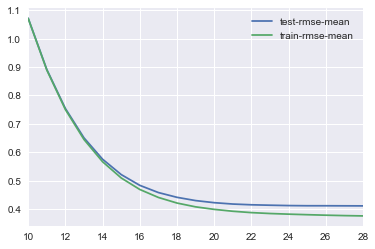

In [114]:
model.loc[10:,["test-rmse-mean", "train-rmse-mean"]].plot()